In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
#n_sensors = 5
#n_sensors = 10
n_sensors = 15

In [3]:
os.chdir('E:\\MLdataset')

In [4]:
x_5degree = pd.read_csv('x_5degree.csv', header=None)

In [5]:
x_5degree = x_5degree.to_numpy(dtype='float32')

In [6]:
x = x_5degree[:, 0:15]

In [7]:
x = x.reshape(((72*3+1)*6, n_sensors, 1))

In [8]:
y_5degree = pd.read_csv('y_output(5deg).csv', header=None)

In [9]:
os.chdir('C:\\Users\\User')

In [10]:
y_5degree = y_5degree.to_numpy(dtype='float32')

In [11]:
y = y_5degree.reshape(((72*3+1)*6, 100, 100))

In [12]:
tsr = x_5degree[:, -2]

In [13]:
theta = x_5degree[:, -1]

In [14]:
x_train, x_test, y_train, y_test, tsr_train, tsr_test, theta_train, theta_test= train_test_split(x,
                                                                                                 y,
                                                                                                 tsr,
                                                                                                 theta,
                                                                                                 test_size=0.3,
                                                                                                 random_state=42)

In [15]:
print(y_train.shape)

(911, 100, 100)


In [16]:
print(y_test.shape)

(391, 100, 100)


In [17]:
print(x_train.shape)

(911, 15, 1)


In [18]:
print(x_test.shape)

(391, 15, 1)


In [19]:
theta_train

array([ 185.,   20.,  725.,  955.,  380.,  895.,  475.,  515.,  520.,
       1075.,  445.,  610., 1040.,  195.,  150.,  125.,  320.,  125.,
        680.,  465.,  630.,  660.,  540.,  325., 1035.,  375.,   15.,
        555.,  265., 1025.,  760.,  485.,   20.,  795.,  680.,  255.,
        485.,  930.,  510.,  895.,  860.,   25.,  500., 1035.,  470.,
        815.,  705.,  130., 1030.,  425.,  820.,  565.,  780.,   50.,
        215.,  915.,  955.,  440.,  330.,  550.,  335., 1080., 1055.,
         60.,  810.,  520.,  410.,  105.,  100.,  420.,  650.,   50.,
         95.,  750.,  280.,  930.,  735.,  655.,  985.,  510., 1080.,
        280.,  395.,  725.,  100.,  540.,  940.,   10.,   30.,  765.,
        470.,  165.,  790.,  740.,  310.,  725., 1075.,  505., 1075.,
        135.,  245.,  850.,  400.,  445.,  250.,  690.,  290., 1050.,
        975.,  685.,  275., 1045.,  195.,  370.,  125.,  595.,  475.,
        235.,  505.,  530.,  375.,  275.,  905., 1065.,  600.,  725.,
        190.,  360.,

In [20]:
tsr_train

array([2. , 1.7, 1.7, 1.8, 2. , 1.9, 1.9, 2. , 1.6, 1.6, 2. , 1.9, 1.6,
       1.5, 1.5, 1.6, 2. , 1.9, 1.5, 1.6, 2. , 1.9, 1.9, 2. , 2. , 2. ,
       1.5, 1.5, 1.8, 2. , 1.8, 1.9, 1.9, 1.6, 1.7, 1.7, 1.6, 1.9, 1.6,
       1.7, 1.8, 1.5, 1.5, 1.6, 1.8, 1.7, 1.7, 1.8, 1.6, 1.9, 2. , 1.8,
       1.7, 1.6, 1.7, 1.7, 2. , 1.7, 1.5, 2. , 1.5, 1.9, 1.5, 1.5, 1.7,
       1.8, 1.6, 1.8, 1.9, 2. , 1.8, 1.8, 1.9, 2. , 1.7, 1.7, 1.8, 2. ,
       1.7, 1.9, 2. , 1.6, 1.7, 1.6, 1.6, 2. , 1.8, 1.5, 1.5, 1.6, 1.6,
       2. , 1.8, 1.7, 1.8, 1.9, 1.5, 1.7, 1.7, 1.5, 2. , 2. , 1.7, 1.7,
       1.9, 1.7, 2. , 1.8, 1.7, 1.6, 2. , 1.7, 1.6, 1.6, 1.5, 1.6, 1.7,
       1.5, 1.6, 1.5, 1.9, 1.5, 1.7, 1.5, 1.5, 1.8, 1.9, 1.5, 1.7, 1.5,
       1.9, 1.8, 1.9, 1.9, 1.7, 1.7, 2. , 1.7, 1.5, 1.5, 1.7, 1.5, 1.6,
       1.6, 1.7, 1.9, 1.7, 1.5, 1.5, 2. , 1.8, 1.5, 1.9, 1.9, 1.7, 1.8,
       1.8, 1.8, 1.7, 1.5, 1.5, 1.9, 1.5, 1.9, 1.7, 1.8, 1.7, 1.5, 1.6,
       1.6, 2. , 1.9, 1.6, 1.5, 1.7, 1.8, 1.9, 1.9, 1.8, 1.8, 2.

In [21]:
os.chdir('C:\\Users\\User')

In [22]:
input_data = tf.keras.Input(shape=(n_sensors, 1))
reshape = tf.keras.layers.Reshape((n_sensors,))(input_data)

x = tf.keras.layers.Dense(units=512, activation='relu', name='firstHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(reshape)
x = tf.keras.layers.Dense(units=512, activation='relu', name='secondHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='thirdHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='fourthHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayer')(x)
output_img = tf.keras.layers.Reshape((100,100))(output_data)
# Shallow Decoder (SD)
sd = tf.keras.Model(input_data, output_img)

In [23]:
sd.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 15, 1)]           0         
                                                                 
 reshape (Reshape)           (None, 15)                0         
                                                                 
 firstHiddenLayer (Dense)    (None, 512)               8192      
                                                                 
 secondHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 thirdHiddenLayer (Dense)    (None, 512)               262656    
                                                                 
 fourthHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 outputLayer (Dense)         (None, 10000)             513000

In [24]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [25]:
start = datetime.datetime.now()
history = sd.fit(x_train, y_train, epochs=2000, shuffle=True, batch_size=40)
end = datetime.datetime.now()

Epoch 1/2000
23/23 [==============================] - 1s 6ms/step - loss: 0.0108 - rmse: 0.1032
Epoch 2/2000
23/23 [==============================] - 0s 6ms/step - loss: 0.0104 - rmse: 0.1011
Epoch 3/2000
23/23 [==============================] - 0s 6ms/step - loss: 0.0086 - rmse: 0.0919
Epoch 4/2000
23/23 [==============================] - 0s 5ms/step - loss: 0.0073 - rmse: 0.0843
Epoch 5/2000
23/23 [==============================] - 0s 5ms/step - loss: 0.0070 - rmse: 0.0830
Epoch 6/2000
23/23 [==============================] - 0s 5ms/step - loss: 0.0067 - rmse: 0.0809
Epoch 7/2000
23/23 [==============================] - 0s 5ms/step - loss: 0.0062 - rmse: 0.0780
Epoch 8/2000
23/23 [==============================] - 0s 6ms/step - loss: 0.0060 - rmse: 0.0766
Epoch 9/2000
23/23 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0760
Epoch 10/2000
23/23 [==============================] - 0s 6ms/step - loss: 0.0058 - rmse: 0.0752
Epoch 11/2000
23/23 [==================

23/23 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0315
Epoch 86/2000
23/23 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0312
Epoch 87/2000
23/23 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0309
Epoch 88/2000
23/23 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0307
Epoch 89/2000
23/23 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0304
Epoch 90/2000
23/23 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0301
Epoch 91/2000
23/23 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0299
Epoch 92/2000
23/23 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0296
Epoch 93/2000
23/23 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0293
Epoch 94/2000
23/23 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0290
Epoch 95/2000
23/23 [=======================

Epoch 166/2000
23/23 [==============================] - 0s 5ms/step - loss: 4.6238e-04 - rmse: 0.0172
Epoch 167/2000
23/23 [==============================] - 0s 5ms/step - loss: 4.6092e-04 - rmse: 0.0172
Epoch 168/2000
23/23 [==============================] - 0s 5ms/step - loss: 4.5786e-04 - rmse: 0.0171
Epoch 169/2000
23/23 [==============================] - 0s 5ms/step - loss: 4.5388e-04 - rmse: 0.0170
Epoch 170/2000
23/23 [==============================] - 0s 5ms/step - loss: 4.5068e-04 - rmse: 0.0169
Epoch 171/2000
23/23 [==============================] - 0s 5ms/step - loss: 4.4819e-04 - rmse: 0.0168
Epoch 172/2000
23/23 [==============================] - 0s 5ms/step - loss: 4.4561e-04 - rmse: 0.0167
Epoch 173/2000
23/23 [==============================] - 0s 5ms/step - loss: 4.4336e-04 - rmse: 0.0167
Epoch 174/2000
23/23 [==============================] - 0s 5ms/step - loss: 4.3844e-04 - rmse: 0.0165
Epoch 175/2000
23/23 [==============================] - 0s 5ms/step - loss: 4.3667

23/23 [==============================] - 0s 5ms/step - loss: 3.0150e-04 - rmse: 0.0119
Epoch 247/2000
23/23 [==============================] - 0s 5ms/step - loss: 3.0053e-04 - rmse: 0.0119
Epoch 248/2000
23/23 [==============================] - 0s 5ms/step - loss: 2.9923e-04 - rmse: 0.0118
Epoch 249/2000
23/23 [==============================] - 0s 5ms/step - loss: 2.9829e-04 - rmse: 0.0118
Epoch 250/2000
23/23 [==============================] - 0s 5ms/step - loss: 2.9789e-04 - rmse: 0.0118
Epoch 251/2000
23/23 [==============================] - 0s 5ms/step - loss: 2.9619e-04 - rmse: 0.0117
Epoch 252/2000
23/23 [==============================] - 0s 5ms/step - loss: 2.9443e-04 - rmse: 0.0116
Epoch 253/2000
23/23 [==============================] - 0s 5ms/step - loss: 2.9351e-04 - rmse: 0.0116
Epoch 254/2000
23/23 [==============================] - 0s 5ms/step - loss: 2.9232e-04 - rmse: 0.0115
Epoch 255/2000
23/23 [==============================] - 0s 5ms/step - loss: 2.9167e-04 - rmse: 0.

23/23 [==============================] - 0s 5ms/step - loss: 2.3478e-04 - rmse: 0.0092
Epoch 327/2000
23/23 [==============================] - 0s 5ms/step - loss: 2.3453e-04 - rmse: 0.0092
Epoch 328/2000
23/23 [==============================] - 0s 5ms/step - loss: 2.3363e-04 - rmse: 0.0091
Epoch 329/2000
23/23 [==============================] - 0s 5ms/step - loss: 2.3286e-04 - rmse: 0.0091
Epoch 330/2000
23/23 [==============================] - 0s 5ms/step - loss: 2.3199e-04 - rmse: 0.0091
Epoch 331/2000
23/23 [==============================] - 0s 5ms/step - loss: 2.3159e-04 - rmse: 0.0090
Epoch 332/2000
23/23 [==============================] - 0s 5ms/step - loss: 2.3124e-04 - rmse: 0.0090
Epoch 333/2000
23/23 [==============================] - 0s 5ms/step - loss: 2.3002e-04 - rmse: 0.0090
Epoch 334/2000
23/23 [==============================] - 0s 5ms/step - loss: 2.2997e-04 - rmse: 0.0090
Epoch 335/2000
23/23 [==============================] - 0s 5ms/step - loss: 2.2970e-04 - rmse: 0.

23/23 [==============================] - 0s 5ms/step - loss: 1.9843e-04 - rmse: 0.0076
Epoch 407/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.9711e-04 - rmse: 0.0076
Epoch 408/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.9645e-04 - rmse: 0.0075
Epoch 409/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.9620e-04 - rmse: 0.0075
Epoch 410/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.9579e-04 - rmse: 0.0075
Epoch 411/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.9577e-04 - rmse: 0.0075
Epoch 412/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.9535e-04 - rmse: 0.0075
Epoch 413/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.9506e-04 - rmse: 0.0075
Epoch 414/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.9492e-04 - rmse: 0.0075
Epoch 415/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.9481e-04 - rmse: 0.

23/23 [==============================] - 0s 5ms/step - loss: 1.7373e-04 - rmse: 0.0066
Epoch 487/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.7396e-04 - rmse: 0.0067
Epoch 488/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.7348e-04 - rmse: 0.0066
Epoch 489/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.7281e-04 - rmse: 0.0066
Epoch 490/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.7245e-04 - rmse: 0.0066
Epoch 491/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.7300e-04 - rmse: 0.0066
Epoch 492/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.7225e-04 - rmse: 0.0066
Epoch 493/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.7193e-04 - rmse: 0.0066
Epoch 494/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.7169e-04 - rmse: 0.0066
Epoch 495/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.7146e-04 - rmse: 0.

23/23 [==============================] - 0s 5ms/step - loss: 1.5648e-04 - rmse: 0.0060
Epoch 567/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.5584e-04 - rmse: 0.0060
Epoch 568/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.5590e-04 - rmse: 0.0060
Epoch 569/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.5587e-04 - rmse: 0.0060
Epoch 570/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.5532e-04 - rmse: 0.0060
Epoch 571/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.5510e-04 - rmse: 0.0059
Epoch 572/2000
23/23 [==============================] - 0s 6ms/step - loss: 1.5547e-04 - rmse: 0.0060
Epoch 573/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.5544e-04 - rmse: 0.0060
Epoch 574/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.5553e-04 - rmse: 0.0060
Epoch 575/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.5421e-04 - rmse: 0.

23/23 [==============================] - 0s 5ms/step - loss: 1.4280e-04 - rmse: 0.0056
Epoch 647/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.4250e-04 - rmse: 0.0055
Epoch 648/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.4263e-04 - rmse: 0.0056
Epoch 649/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.4263e-04 - rmse: 0.0056
Epoch 650/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.4211e-04 - rmse: 0.0055
Epoch 651/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.4174e-04 - rmse: 0.0055
Epoch 652/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.4146e-04 - rmse: 0.0055
Epoch 653/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.4131e-04 - rmse: 0.0055
Epoch 654/2000
23/23 [==============================] - 0s 6ms/step - loss: 1.4107e-04 - rmse: 0.0055
Epoch 655/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.4161e-04 - rmse: 0.

23/23 [==============================] - 0s 5ms/step - loss: 1.3129e-04 - rmse: 0.0052
Epoch 727/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.3115e-04 - rmse: 0.0052
Epoch 728/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.3125e-04 - rmse: 0.0052
Epoch 729/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.3106e-04 - rmse: 0.0052
Epoch 730/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.3086e-04 - rmse: 0.0052
Epoch 731/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.3056e-04 - rmse: 0.0052
Epoch 732/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.3018e-04 - rmse: 0.0051
Epoch 733/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.3019e-04 - rmse: 0.0051
Epoch 734/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.3026e-04 - rmse: 0.0052
Epoch 735/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.3052e-04 - rmse: 0.

23/23 [==============================] - 0s 5ms/step - loss: 1.2238e-04 - rmse: 0.0050
Epoch 807/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.2169e-04 - rmse: 0.0049
Epoch 808/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.2159e-04 - rmse: 0.0049
Epoch 809/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.2169e-04 - rmse: 0.0049
Epoch 810/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.2169e-04 - rmse: 0.0049
Epoch 811/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.2137e-04 - rmse: 0.0049
Epoch 812/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.2144e-04 - rmse: 0.0049
Epoch 813/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.2139e-04 - rmse: 0.0049
Epoch 814/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.2117e-04 - rmse: 0.0049
Epoch 815/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.2115e-04 - rmse: 0.

23/23 [==============================] - 0s 5ms/step - loss: 1.1381e-04 - rmse: 0.0047
Epoch 887/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.1393e-04 - rmse: 0.0047
Epoch 888/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.1449e-04 - rmse: 0.0048
Epoch 889/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.1385e-04 - rmse: 0.0047
Epoch 890/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.1355e-04 - rmse: 0.0047
Epoch 891/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.1377e-04 - rmse: 0.0047
Epoch 892/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.1432e-04 - rmse: 0.0048
Epoch 893/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.1346e-04 - rmse: 0.0047
Epoch 894/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.1329e-04 - rmse: 0.0047
Epoch 895/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.1304e-04 - rmse: 0.

23/23 [==============================] - 0s 5ms/step - loss: 1.0679e-04 - rmse: 0.0045
Epoch 967/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.0703e-04 - rmse: 0.0045
Epoch 968/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.0680e-04 - rmse: 0.0045
Epoch 969/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.0671e-04 - rmse: 0.0045
Epoch 970/2000
23/23 [==============================] - 0s 6ms/step - loss: 1.0694e-04 - rmse: 0.0045
Epoch 971/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.0683e-04 - rmse: 0.0045
Epoch 972/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.0694e-04 - rmse: 0.0045
Epoch 973/2000
23/23 [==============================] - 0s 6ms/step - loss: 1.0673e-04 - rmse: 0.0045
Epoch 974/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.0642e-04 - rmse: 0.0045
Epoch 975/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.0623e-04 - rmse: 0.

23/23 [==============================] - 0s 6ms/step - loss: 1.0159e-04 - rmse: 0.0044
Epoch 1047/2000
23/23 [==============================] - 0s 6ms/step - loss: 1.0169e-04 - rmse: 0.0044
Epoch 1048/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.0146e-04 - rmse: 0.0044
Epoch 1049/2000
23/23 [==============================] - 0s 6ms/step - loss: 1.0103e-04 - rmse: 0.0044
Epoch 1050/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.0074e-04 - rmse: 0.0043
Epoch 1051/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.0070e-04 - rmse: 0.0043
Epoch 1052/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.0085e-04 - rmse: 0.0043
Epoch 1053/2000
23/23 [==============================] - 0s 5ms/step - loss: 1.0042e-04 - rmse: 0.0043
Epoch 1054/2000
23/23 [==============================] - 0s 6ms/step - loss: 1.0031e-04 - rmse: 0.0043
Epoch 1055/2000
23/23 [==============================] - 0s 6ms/step - loss: 1.0019e-04 -

23/23 [==============================] - 0s 5ms/step - loss: 9.5872e-05 - rmse: 0.0042
Epoch 1126/2000
23/23 [==============================] - 0s 5ms/step - loss: 9.5615e-05 - rmse: 0.0042
Epoch 1127/2000
23/23 [==============================] - 0s 5ms/step - loss: 9.5941e-05 - rmse: 0.0042
Epoch 1128/2000
23/23 [==============================] - 0s 5ms/step - loss: 9.5984e-05 - rmse: 0.0042
Epoch 1129/2000
23/23 [==============================] - 0s 6ms/step - loss: 9.6750e-05 - rmse: 0.0043
Epoch 1130/2000
23/23 [==============================] - 0s 5ms/step - loss: 9.6576e-05 - rmse: 0.0043
Epoch 1131/2000
23/23 [==============================] - 0s 5ms/step - loss: 9.6257e-05 - rmse: 0.0043
Epoch 1132/2000
23/23 [==============================] - 0s 5ms/step - loss: 9.5419e-05 - rmse: 0.0042
Epoch 1133/2000
23/23 [==============================] - 0s 5ms/step - loss: 9.5208e-05 - rmse: 0.0042
Epoch 1134/2000
23/23 [==============================] - 0s 5ms/step - loss: 9.4844e-05 -

23/23 [==============================] - 0s 5ms/step - loss: 9.1371e-05 - rmse: 0.0041
Epoch 1205/2000
23/23 [==============================] - 0s 5ms/step - loss: 9.1032e-05 - rmse: 0.0040
Epoch 1206/2000
23/23 [==============================] - 0s 5ms/step - loss: 9.1859e-05 - rmse: 0.0041
Epoch 1207/2000
23/23 [==============================] - 0s 5ms/step - loss: 9.1326e-05 - rmse: 0.0041
Epoch 1208/2000
23/23 [==============================] - 0s 5ms/step - loss: 9.1080e-05 - rmse: 0.0041
Epoch 1209/2000
23/23 [==============================] - 0s 5ms/step - loss: 9.1454e-05 - rmse: 0.0041
Epoch 1210/2000
23/23 [==============================] - 0s 5ms/step - loss: 9.1426e-05 - rmse: 0.0041
Epoch 1211/2000
23/23 [==============================] - 0s 5ms/step - loss: 9.1321e-05 - rmse: 0.0041
Epoch 1212/2000
23/23 [==============================] - 0s 5ms/step - loss: 9.1000e-05 - rmse: 0.0041
Epoch 1213/2000
23/23 [==============================] - 0s 5ms/step - loss: 9.0971e-05 -

23/23 [==============================] - 0s 6ms/step - loss: 8.7436e-05 - rmse: 0.0040
Epoch 1284/2000
23/23 [==============================] - 0s 5ms/step - loss: 8.7364e-05 - rmse: 0.0040
Epoch 1285/2000
23/23 [==============================] - 0s 5ms/step - loss: 8.7242e-05 - rmse: 0.0040
Epoch 1286/2000
23/23 [==============================] - 0s 5ms/step - loss: 8.7494e-05 - rmse: 0.0040
Epoch 1287/2000
23/23 [==============================] - 0s 5ms/step - loss: 8.7191e-05 - rmse: 0.0040
Epoch 1288/2000
23/23 [==============================] - 0s 5ms/step - loss: 8.7038e-05 - rmse: 0.0039
Epoch 1289/2000
23/23 [==============================] - 0s 5ms/step - loss: 8.7407e-05 - rmse: 0.0040
Epoch 1290/2000
23/23 [==============================] - 0s 5ms/step - loss: 8.7174e-05 - rmse: 0.0040
Epoch 1291/2000
23/23 [==============================] - 0s 6ms/step - loss: 8.7239e-05 - rmse: 0.0040
Epoch 1292/2000
23/23 [==============================] - 0s 5ms/step - loss: 8.7277e-05 -

23/23 [==============================] - 0s 5ms/step - loss: 8.4235e-05 - rmse: 0.0039
Epoch 1363/2000
23/23 [==============================] - 0s 5ms/step - loss: 8.3686e-05 - rmse: 0.0038
Epoch 1364/2000
23/23 [==============================] - 0s 5ms/step - loss: 8.3508e-05 - rmse: 0.0038
Epoch 1365/2000
23/23 [==============================] - 0s 5ms/step - loss: 8.4088e-05 - rmse: 0.0039
Epoch 1366/2000
23/23 [==============================] - 0s 5ms/step - loss: 8.4036e-05 - rmse: 0.0039
Epoch 1367/2000
23/23 [==============================] - 0s 5ms/step - loss: 8.3642e-05 - rmse: 0.0039
Epoch 1368/2000
23/23 [==============================] - 0s 5ms/step - loss: 8.3889e-05 - rmse: 0.0039
Epoch 1369/2000
23/23 [==============================] - 0s 5ms/step - loss: 8.3517e-05 - rmse: 0.0039
Epoch 1370/2000
23/23 [==============================] - 0s 5ms/step - loss: 8.3354e-05 - rmse: 0.0038
Epoch 1371/2000
23/23 [==============================] - 0s 5ms/step - loss: 8.3836e-05 -

23/23 [==============================] - 0s 5ms/step - loss: 8.0569e-05 - rmse: 0.0038
Epoch 1442/2000
23/23 [==============================] - 0s 5ms/step - loss: 8.0941e-05 - rmse: 0.0038
Epoch 1443/2000
23/23 [==============================] - 0s 5ms/step - loss: 8.1162e-05 - rmse: 0.0038
Epoch 1444/2000
23/23 [==============================] - 0s 5ms/step - loss: 8.0830e-05 - rmse: 0.0038
Epoch 1445/2000
23/23 [==============================] - 0s 5ms/step - loss: 8.0372e-05 - rmse: 0.0037
Epoch 1446/2000
23/23 [==============================] - 0s 5ms/step - loss: 8.0601e-05 - rmse: 0.0038
Epoch 1447/2000
23/23 [==============================] - 0s 5ms/step - loss: 8.0407e-05 - rmse: 0.0038
Epoch 1448/2000
23/23 [==============================] - 0s 5ms/step - loss: 8.0511e-05 - rmse: 0.0038
Epoch 1449/2000
23/23 [==============================] - 0s 5ms/step - loss: 8.0540e-05 - rmse: 0.0038
Epoch 1450/2000
23/23 [==============================] - 0s 5ms/step - loss: 8.0686e-05 -

23/23 [==============================] - 0s 5ms/step - loss: 7.7789e-05 - rmse: 0.0037
Epoch 1521/2000
23/23 [==============================] - 0s 5ms/step - loss: 7.7954e-05 - rmse: 0.0037
Epoch 1522/2000
23/23 [==============================] - 0s 5ms/step - loss: 7.8080e-05 - rmse: 0.0037
Epoch 1523/2000
23/23 [==============================] - 0s 5ms/step - loss: 7.7766e-05 - rmse: 0.0037
Epoch 1524/2000
23/23 [==============================] - 0s 5ms/step - loss: 7.7421e-05 - rmse: 0.0037
Epoch 1525/2000
23/23 [==============================] - 0s 5ms/step - loss: 7.7535e-05 - rmse: 0.0037
Epoch 1526/2000
23/23 [==============================] - 0s 5ms/step - loss: 7.8122e-05 - rmse: 0.0038
Epoch 1527/2000
23/23 [==============================] - 0s 5ms/step - loss: 7.8357e-05 - rmse: 0.0038
Epoch 1528/2000
23/23 [==============================] - 0s 5ms/step - loss: 7.8188e-05 - rmse: 0.0038
Epoch 1529/2000
23/23 [==============================] - 0s 5ms/step - loss: 7.7924e-05 -

23/23 [==============================] - 0s 5ms/step - loss: 7.5364e-05 - rmse: 0.0036
Epoch 1600/2000
23/23 [==============================] - 0s 6ms/step - loss: 7.4954e-05 - rmse: 0.0036
Epoch 1601/2000
23/23 [==============================] - 0s 5ms/step - loss: 7.4980e-05 - rmse: 0.0036
Epoch 1602/2000
23/23 [==============================] - 0s 6ms/step - loss: 7.4851e-05 - rmse: 0.0036
Epoch 1603/2000
23/23 [==============================] - 0s 6ms/step - loss: 7.4933e-05 - rmse: 0.0036
Epoch 1604/2000
23/23 [==============================] - 0s 6ms/step - loss: 7.5081e-05 - rmse: 0.0036
Epoch 1605/2000
23/23 [==============================] - 0s 6ms/step - loss: 7.5255e-05 - rmse: 0.0036
Epoch 1606/2000
23/23 [==============================] - 0s 5ms/step - loss: 7.5131e-05 - rmse: 0.0036
Epoch 1607/2000
23/23 [==============================] - 0s 5ms/step - loss: 7.5123e-05 - rmse: 0.0036
Epoch 1608/2000
23/23 [==============================] - 0s 5ms/step - loss: 7.4897e-05 -

23/23 [==============================] - 0s 5ms/step - loss: 7.2992e-05 - rmse: 0.0036
Epoch 1679/2000
23/23 [==============================] - 0s 5ms/step - loss: 7.3276e-05 - rmse: 0.0036
Epoch 1680/2000
23/23 [==============================] - 0s 6ms/step - loss: 7.2918e-05 - rmse: 0.0036
Epoch 1681/2000
23/23 [==============================] - 0s 5ms/step - loss: 7.2915e-05 - rmse: 0.0036
Epoch 1682/2000
23/23 [==============================] - 0s 5ms/step - loss: 7.3186e-05 - rmse: 0.0036
Epoch 1683/2000
23/23 [==============================] - 0s 5ms/step - loss: 7.3026e-05 - rmse: 0.0036
Epoch 1684/2000
23/23 [==============================] - 0s 5ms/step - loss: 7.2772e-05 - rmse: 0.0036
Epoch 1685/2000
23/23 [==============================] - 0s 5ms/step - loss: 7.2970e-05 - rmse: 0.0036
Epoch 1686/2000
23/23 [==============================] - 0s 5ms/step - loss: 7.3176e-05 - rmse: 0.0036
Epoch 1687/2000
23/23 [==============================] - 0s 5ms/step - loss: 7.2980e-05 -

23/23 [==============================] - 0s 5ms/step - loss: 7.1090e-05 - rmse: 0.0035
Epoch 1758/2000
23/23 [==============================] - 0s 6ms/step - loss: 7.1249e-05 - rmse: 0.0036
Epoch 1759/2000
23/23 [==============================] - 0s 6ms/step - loss: 7.0777e-05 - rmse: 0.0035
Epoch 1760/2000
23/23 [==============================] - 0s 6ms/step - loss: 7.0837e-05 - rmse: 0.0035
Epoch 1761/2000
23/23 [==============================] - 0s 6ms/step - loss: 7.0679e-05 - rmse: 0.0035
Epoch 1762/2000
23/23 [==============================] - 0s 5ms/step - loss: 7.0732e-05 - rmse: 0.0035
Epoch 1763/2000
23/23 [==============================] - 0s 6ms/step - loss: 7.1137e-05 - rmse: 0.0036
Epoch 1764/2000
23/23 [==============================] - 0s 6ms/step - loss: 7.1230e-05 - rmse: 0.0036
Epoch 1765/2000
23/23 [==============================] - 0s 6ms/step - loss: 7.0926e-05 - rmse: 0.0035
Epoch 1766/2000
23/23 [==============================] - 0s 5ms/step - loss: 7.0394e-05 -

23/23 [==============================] - 0s 6ms/step - loss: 6.9001e-05 - rmse: 0.0035
Epoch 1837/2000
23/23 [==============================] - 0s 6ms/step - loss: 6.8807e-05 - rmse: 0.0034
Epoch 1838/2000
23/23 [==============================] - 0s 5ms/step - loss: 6.8752e-05 - rmse: 0.0034
Epoch 1839/2000
23/23 [==============================] - 0s 5ms/step - loss: 6.8878e-05 - rmse: 0.0034
Epoch 1840/2000
23/23 [==============================] - 0s 6ms/step - loss: 6.9163e-05 - rmse: 0.0035
Epoch 1841/2000
23/23 [==============================] - 0s 6ms/step - loss: 6.9271e-05 - rmse: 0.0035
Epoch 1842/2000
23/23 [==============================] - 0s 5ms/step - loss: 6.8948e-05 - rmse: 0.0035
Epoch 1843/2000
23/23 [==============================] - 0s 5ms/step - loss: 6.8525e-05 - rmse: 0.0034
Epoch 1844/2000
23/23 [==============================] - 0s 5ms/step - loss: 6.8937e-05 - rmse: 0.0035
Epoch 1845/2000
23/23 [==============================] - 0s 5ms/step - loss: 6.8775e-05 -

23/23 [==============================] - 0s 5ms/step - loss: 6.7258e-05 - rmse: 0.0034
Epoch 1916/2000
23/23 [==============================] - 0s 5ms/step - loss: 6.7056e-05 - rmse: 0.0034
Epoch 1917/2000
23/23 [==============================] - 0s 5ms/step - loss: 6.7037e-05 - rmse: 0.0034
Epoch 1918/2000
23/23 [==============================] - 0s 5ms/step - loss: 6.7091e-05 - rmse: 0.0034
Epoch 1919/2000
23/23 [==============================] - 0s 5ms/step - loss: 6.6921e-05 - rmse: 0.0034
Epoch 1920/2000
23/23 [==============================] - 0s 5ms/step - loss: 6.6757e-05 - rmse: 0.0033
Epoch 1921/2000
23/23 [==============================] - 0s 5ms/step - loss: 6.6695e-05 - rmse: 0.0033
Epoch 1922/2000
23/23 [==============================] - 0s 5ms/step - loss: 6.6793e-05 - rmse: 0.0034
Epoch 1923/2000
23/23 [==============================] - 0s 5ms/step - loss: 6.6899e-05 - rmse: 0.0034
Epoch 1924/2000
23/23 [==============================] - 0s 5ms/step - loss: 6.6990e-05 -

23/23 [==============================] - 0s 6ms/step - loss: 6.6042e-05 - rmse: 0.0034
Epoch 1995/2000
23/23 [==============================] - 0s 5ms/step - loss: 6.6317e-05 - rmse: 0.0035
Epoch 1996/2000
23/23 [==============================] - 0s 6ms/step - loss: 6.5850e-05 - rmse: 0.0034
Epoch 1997/2000
23/23 [==============================] - 0s 6ms/step - loss: 6.5601e-05 - rmse: 0.0034
Epoch 1998/2000
23/23 [==============================] - 0s 6ms/step - loss: 6.5768e-05 - rmse: 0.0034
Epoch 1999/2000
23/23 [==============================] - 0s 5ms/step - loss: 6.5428e-05 - rmse: 0.0033
Epoch 2000/2000
23/23 [==============================] - 0s 5ms/step - loss: 6.5852e-05 - rmse: 0.0034


In [26]:
time = end - start
print("Training time:", time)

Training time: 0:04:11.337991


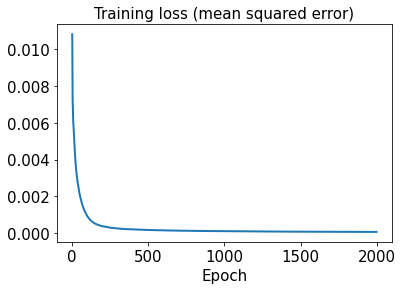

In [27]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

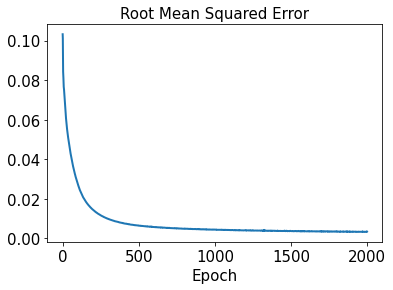

In [28]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [29]:
test_results = sd.evaluate(x_train)

29/29 [==============================] - 0s 1ms/step - loss: 5.4202e-05 - rmse: 0.0000e+00


In [30]:
decoded_train = sd.predict(x_train)

In [31]:
decoded_test = sd.predict(x_test)

In [32]:
error_train_abs = np.abs(decoded_train - y_train)

In [33]:
error_test_abs = np.abs(decoded_test - y_test)

In [34]:
l2_error_train = np.sum((decoded_train - y_train)**2) / np.sum(y_train**2)
print(l2_error_train)

0.0010338059


In [35]:
l2_error_test = np.sum((decoded_test - y_test)**2) / np.sum(y_test**2)
print(l2_error_test)

0.006254027


In [36]:
l2_error_train_list = []
for i in range(0, len(x_train)):
    l2_error_train_data = np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2)
    l2_error_train_list.append(l2_error_train_data)
print(l2_error_train_list)

[0.0028433795, 0.001010153, 0.00054219697, 0.00075393, 0.0006866874, 0.0006823663, 0.0003192714, 0.0020508482, 0.0008416807, 0.0024480016, 0.0010258801, 0.00039423353, 0.0016616373, 0.0008183377, 0.0011445232, 0.001913395, 0.00076561474, 0.00055201893, 0.0013006617, 0.0049242256, 0.0016011355, 0.0007840914, 0.00057892303, 0.0011365943, 0.0012951978, 0.00076953747, 0.0007224418, 0.0005270164, 0.0006502992, 0.0013264975, 0.00047572353, 0.00038743133, 0.0004357186, 0.00085646013, 0.00078713254, 0.00068679824, 0.002017383, 0.0008275929, 0.00062109483, 0.00059685105, 0.0007858541, 0.0006960784, 0.00061698636, 0.0019406002, 0.001103346, 0.00088854344, 0.00071933534, 0.00051167654, 0.0007341212, 0.00045087675, 0.00076008716, 0.0006105913, 0.0008511326, 0.0016884352, 0.0014995097, 0.0005077043, 0.0016208505, 0.00038236068, 0.0008883512, 0.00094390323, 0.0008036152, 0.00042258075, 0.0013673843, 0.0006966791, 0.0006518662, 0.0007376668, 0.0025053683, 0.0005310268, 0.0005851786, 0.001234927, 0.00

In [37]:
l2_error_test_list = []
for i in range(0, len(x_test)):
    l2_error_test_data = np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2)
    l2_error_test_list.append(l2_error_test_data)
print(l2_error_test_list)

[0.007320642, 0.04259905, 0.0041230572, 0.042190295, 0.0033241957, 0.0018705267, 0.0011317934, 0.23336095, 0.006895141, 0.002612351, 0.0051394743, 0.00079252286, 0.0042114104, 0.0031541274, 0.0012918981, 0.005148217, 0.0023457306, 0.0017333865, 0.0009424883, 0.0012492269, 0.07454652, 0.0009024157, 0.0007944768, 0.0037027216, 0.0011525919, 0.003349788, 0.0018164072, 0.001003312, 0.0014095745, 0.0025089013, 0.004680979, 0.0083119925, 0.0034823918, 0.0011713367, 0.004915738, 0.0017821382, 0.001984981, 0.0016917097, 0.0012469427, 0.0009122127, 0.001993757, 0.0015638378, 0.003765295, 0.00113361, 0.0012617854, 0.0045209783, 0.0012648373, 0.00097315875, 0.0013868378, 0.0019433075, 0.0054167947, 0.0035029943, 0.0012945528, 0.0017000863, 0.00348093, 0.003909491, 0.0011058733, 0.0015299667, 0.0025473814, 0.0020642495, 0.0012756864, 0.0013467049, 0.0018061675, 0.0031912294, 0.0084110005, 0.0026564805, 0.005169524, 0.0017967084, 0.0017049441, 0.0011380565, 0.0017371428, 0.0013303088, 0.0012088955,

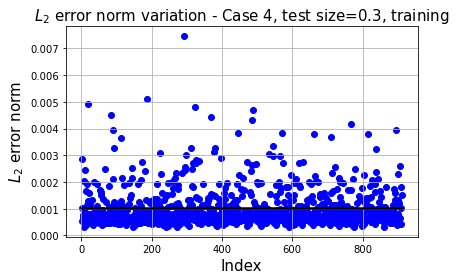

In [38]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - Case 4, test size=0.3, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

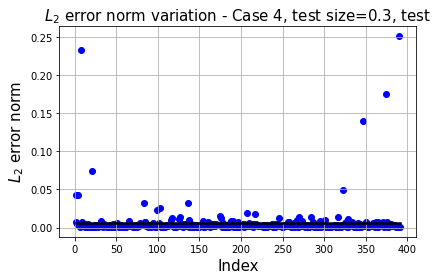

In [39]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - Case 4, test size=0.3, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

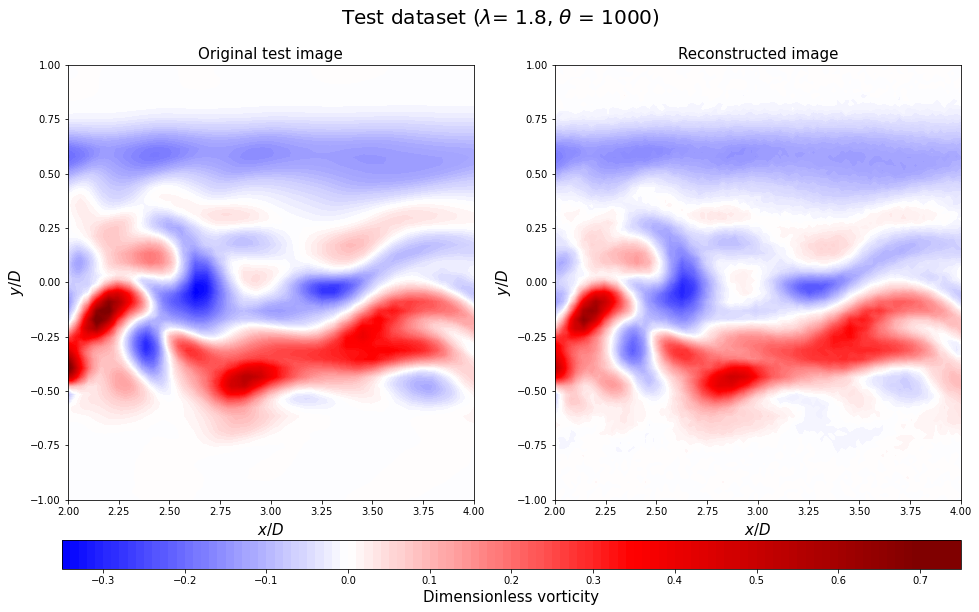

In [42]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = decoded_test[3].T.reshape(100, 100)

xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.7,0.7)
a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\lambda$= %.1f, $\theta$ = %d)' %(tsr_test[3], theta_test[3]),fontsize=20)
plt.show()

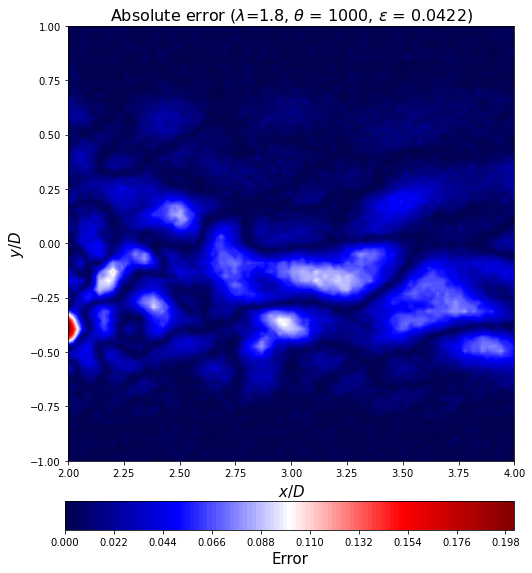

In [41]:
error_test_abs3_rotate = error_test_abs[3].T.reshape(100, 100)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error ($\lambda$=%.1f, $\theta$ = %d, $\epsilon$ = %.4f)' %(tsr_test[3],theta_test[3], l2_error_test_list[3]), fontsize=16)
ax5.set_xlabel('$x/D$', fontsize=15)
ax5.set_ylabel('$y/D$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()